In [31]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


import warnings
warnings.filterwarnings('ignore')

In [6]:
df_tr_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph1_bytime.csv", encoding='cp949')
df_ts_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_in.csv", encoding='cp949')
df_ts_2 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_out.csv", encoding='cp949')

df_tr = df_tr_1.replace('Normal', 0)
df_ts_1 = df_ts_1.replace('정상', 0)
df_ts_1 = df_ts_1.replace('이상', 1)
df_ts_2 = df_ts_2.replace('정상', 0)
df_ts_2 = df_ts_2.replace('이상', 1)

df_tr_1 = df_tr_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_1 = df_ts_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_2 = df_ts_2.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})

df_tr = df_tr_1.iloc[:, 7:49] # train
df_ts = pd.concat([df_ts_1.iloc[:,7:49], df_ts_2.iloc[:,7:49]])
df_tr_x = df_tr.iloc[:,:-1]
df_ts_x = df_ts.iloc[:,:-1]

df_tr_x = df_tr_x.reset_index(drop = True)
#df_tr_x = np.array(df_tr_x)
df_ts_x = df_ts_x.reset_index(drop = True)
#df_ts_x = np.array(df_ts_x)

In [7]:
from sklearn.mixture import GaussianMixture

# GMM: n_components = 모델의 총 수
gm = GaussianMixture(n_components=5, covariance_type = 'full',n_init=15, random_state=42)
gm.fit(df_tr_x)

GaussianMixture(n_components=5, n_init=15, random_state=42)

In [8]:
gm.weights_

array([0.199     , 0.05943604, 0.2895    , 0.44356396, 0.0085    ])

In [9]:
gm.means_

array([[3.38626809e+02, 5.57040466e-01, 3.59159925e+02, 4.08117493e-01,
        1.33202814e+02, 8.93507513e-02, 9.54518467e-02, 1.63316583e-03,
        3.09872111e+01, 1.34491654e-01, 1.88643447e+03, 4.27936221e+00,
        4.00492495e+04, 1.55840268e+01, 2.50115569e+04, 6.58535281e+00,
        1.81846884e-05, 2.26469849e+01, 1.37142923e-02, 9.89660093e+03,
        1.74395789e+00, 1.10342902e+03, 5.23983166e+01, 7.24846236e-01,
        2.74953377e+03, 6.35933588e+00, 6.60349935e+04, 3.44825097e+01,
        2.90195357e+04, 8.18057659e+00, 2.17662188e-04, 3.30302513e+01,
        6.07708100e-02, 2.27319238e+04, 5.39996665e+00, 6.80394123e+03,
        2.13284825e+00, 1.36675000e+02, 2.62605136e+02, 1.00272638e+02,
        1.00166683e+02],
       [3.38430476e+02, 6.14468552e-01, 3.59058197e+02, 3.92488615e-01,
        1.34087959e+02, 1.45098106e-01, 9.76837464e-02, 4.48307095e-03,
        2.93507758e+01, 3.07005204e-01, 1.99086504e+03, 5.07848882e+00,
        4.00628899e+04, 3.67913671e+01,

In [10]:
gm.covariances_

array([[[ 1.03329459e+00, -3.38530554e-02,  3.19544484e-01, ...,
         -3.47266975e+00,  2.83890716e-02,  8.60467042e-02],
        [-3.38530554e-02,  6.35305347e-03, -1.02309227e-02, ...,
          3.08637742e-01, -2.93265896e-03, -6.84377778e-03],
        [ 3.19544484e-01, -1.02309227e-02,  1.28549990e-01, ...,
         -6.87839523e-01, -4.85570876e-02, -1.59145545e-03],
        ...,
        [-3.47266975e+00,  3.08637742e-01, -6.87839523e-01, ...,
          2.63946400e+04, -9.94904018e+00, -8.76780981e+00],
        [ 2.83890716e-02, -2.93265896e-03, -4.85570876e-02, ...,
         -9.94904018e+00,  4.67073688e-01,  2.71736388e-01],
        [ 8.60467042e-02, -6.84377778e-03, -1.59145545e-03, ...,
         -8.76780981e+00,  2.71736388e-01,  2.81435729e-01]],

       [[ 4.05743459e-01, -1.47068921e-02,  1.37063568e-01, ...,
         -2.68611398e+01,  4.06588514e-02,  1.97159167e-01],
        [-1.47068921e-02,  9.80563684e-03, -3.31374286e-03, ...,
         -3.30719098e+00, -1.08095592e

In [11]:
# 알고리즘이 수렴했는지 여부
gm.converged_

True

In [12]:
# 반복 횟수
gm.n_iter_

21

In [13]:
gm.predict(df_ts_x)

array([0, 3, 1, ..., 3, 0, 3], dtype=int64)

In [14]:
gm.predict_proba(df_ts_x)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [7.38423432e-44, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 6.43743488e-51, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 3.34233607e-50, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.59799636e-35, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00]])

In [15]:
gm.score_samples(df_ts_x)

array([ -34.04776131,  -32.14329009,  -26.40968531, ..., -100.36864877,
       -210.65050869, -204.71993356])

In [39]:
densities = gm.score_samples(df_ts_x)
density_threshold = np.percentile(densities, 50)
anomalies = df_ts_x[densities < density_threshold]

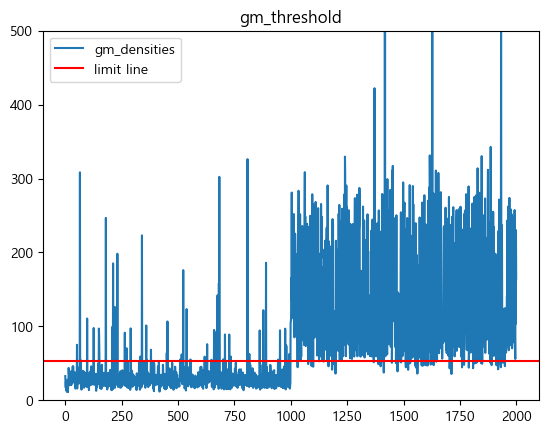

In [40]:
plt.plot(abs(densities), label = 'gm_densities')
plt.ylim(0,500)
plt.axhline(y = abs(density_threshold), color = 'r', label = 'limit line')
plt.title('gm_threshold')
plt.legend()
plt.show()

In [18]:
print(np.array(np.where(anomalies.index < 1000)).size)

print(1000-np.array(np.where(anomalies.index > 1000)).size)


75
76


In [19]:
print(gm.bic(df_tr_x))
print(gm.aic(df_tr_x))

154504.2392678295
129221.76556545653


In [20]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=4, n_init=15, random_state=42)
bgm.fit(df_tr_x)
np.round(bgm.weights_, 2)

array([0.31, 0.38, 0.02, 0.28])

In [21]:
bgm.score_samples(df_ts_x)

array([ -38.71665183,  -42.52113702,  -27.48490784, ..., -112.89367101,
       -108.01516988, -202.67150676])

In [36]:
bgm_densities = bgm.score_samples(df_ts_x)
bgm_density_threshold = np.percentile(bgm_densities, 50)
bgm_anomalies = df_ts_x[bgm_densities < bgm_density_threshold]

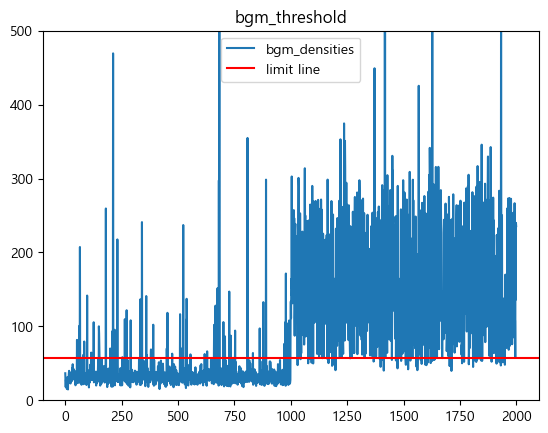

In [37]:
plt.plot(abs(bgm_densities), label = 'bgm_densities')
plt.ylim(0,500)
plt.axhline(y = abs(bgm_density_threshold), color = 'r', label = 'limit line')
plt.title('bgm_threshold')
plt.legend()
plt.show()

In [24]:
print(np.array(np.where(bgm_anomalies.index < 1000)).size)

print(1000-np.array(np.where(bgm_anomalies.index > 1000)).size)


68
69


In [25]:
gm_alpha = []
gm_beta = []
for k in range(2,8):
    gm = GaussianMixture(n_components=k, covariance_type = 'full',n_init=15, random_state=42)
    gm.fit(df_tr_x)
    for i in range(1,10000):
        i = i/100
        gm_densities = gm.score_samples(df_ts_x)
        gm_density_threshold = np.percentile(gm_densities, i)
        gm_anomalies = df_ts_x[gm_densities < gm_density_threshold]
        gm_alpha.append(np.array(np.where(gm_anomalies.index < 1000)).size)
        gm_beta.append(1000-np.array(np.where(gm_anomalies.index > 1000)).size)

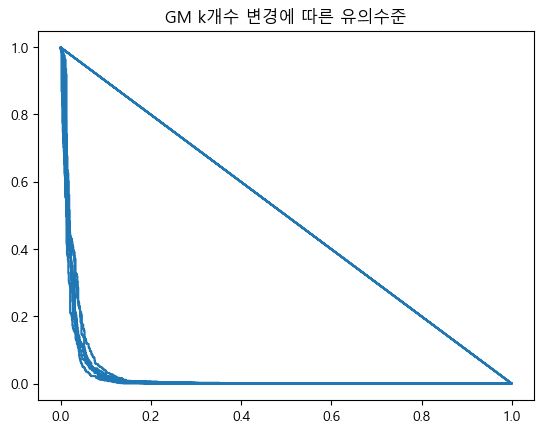

In [33]:
plt.title('GM k개수 변경에 따른 유의수준')
plt.plot(np.array(gm_alpha)/1000,np.array(gm_beta)/1000)

In [27]:
bgm_alpha = []
bgm_beta = []

for k in range(2,8):
    bgm = BayesianGaussianMixture(n_components=k, n_init=15, random_state=42)
    bgm.fit(df_tr_x)
    for i in range(1,10000):
        i = i/100
        bgm_densities = bgm.score_samples(df_ts_x)
        bgm_density_threshold = np.percentile(densities, i)
        bgm_anomalies = df_ts_x[bgm_densities < bgm_density_threshold]
        bgm_alpha.append(np.array(np.where(bgm_anomalies.index < 1000)).size)
        bgm_beta.append(1000-np.array(np.where(bgm_anomalies.index > 1000)).size)

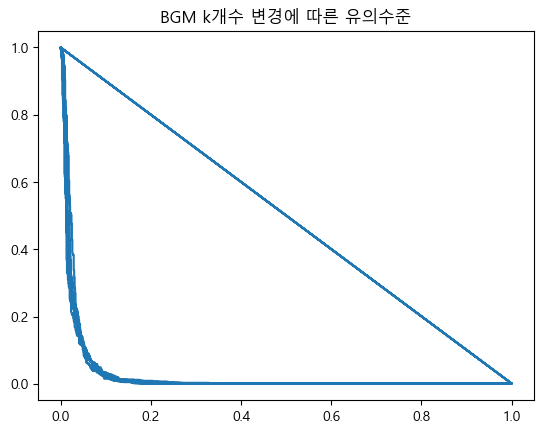

In [34]:
plt.title('BGM k개수 변경에 따른 유의수준')
plt.plot(np.array(bgm_alpha)/1000,np.array(bgm_beta)/1000)

In [42]:
gm_alpha = []
gm_beta = []
bgm_alpha = []
bgm_beta = []

for i in range(1,10000):
    i = i/100
    gm_densities = gm.score_samples(df_ts_x)
    gm_density_threshold = np.percentile(gm_densities, i)
    gm_anomalies = df_ts_x[gm_densities < gm_density_threshold]
    gm_alpha.append(np.array(np.where(gm_anomalies.index < 1000)).size)
    gm_beta.append(1000-np.array(np.where(gm_anomalies.index > 1000)).size)

    bgm_densities = bgm.score_samples(df_ts_x)
    bgm_density_threshold = np.percentile(densities, i)
    bgm_anomalies = df_ts_x[bgm_densities < bgm_density_threshold]
    bgm_alpha.append(np.array(np.where(bgm_anomalies.index < 1000)).size)
    bgm_beta.append(1000-np.array(np.where(bgm_anomalies.index > 1000)).size)

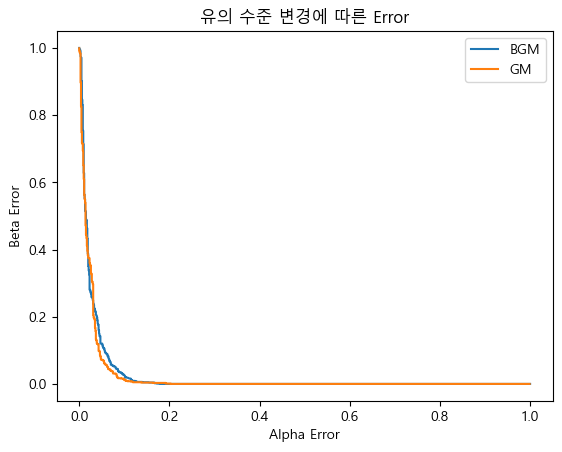

In [44]:
plt.plot(np.array(bgm_alpha)/1000,np.array(bgm_beta)/1000, label = 'BGM')
plt.plot(np.array(gm_alpha)/1000,np.array(gm_beta)/1000, label = 'GM')
plt.legend()
plt.title('유의 수준 변경에 따른 Error')
plt.xlabel('Alpha Error')
plt.ylabel('Beta Error')
plt.show()